In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import chisquare
from scipy.stats import ttest_ind
import geopandas
from IPython.display import display


In [42]:
#
# Handle missing values: You can either drop or impute missing values.
# Remove duplicates: Ensure that your dataset doesn't have duplicate rows.


In [ ]:
def IQR_outlier_report(column_list):
    
    '''
    This function takes list and returns a report
    of the number of outliers in the column based on the IQR method.
    '''
    q1 = column_list.quantile(.25)
    q3 = column_list.quantile(.75)
    # print(column)
    # print(f'Q1: {q1}')
    # print(f'Q3: {q3}')
    q2 = column_list.quantile(.5)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return lower_bound, upper_bound, q1, q3, q2

In [43]:
college_df = pd.read_excel(io='data/geocode_college_with_address.xlsx', index_col=0)
college_df.value_counts()

# Droping columns high uniques values.
college_df.drop(['Address1', 'Address2', 'Latitude', 'Longitude','Zip Code', 'Region', 'County'], axis=1, inplace=True)
print(college_df.shape)

(1302, 19)


In [4]:
### Hot encoding
import pandas as pd

# One-Hot Encoding with Drop-First
df_encoded = pd.get_dummies(college_df, drop_first=True)
print(df_encoded.shape)

(1302, 68)


In [39]:
# IMPUTE data, Median Imputation
college_imputed_df= df_encoded.apply(lambda x: \
    x.fillna(x.median()), axis=0)
print(college_imputed_df.shape)


(1302, 68)


In [45]:
#feature scaling
from sklearn.preprocessing import StandardScaler

# Assume X is your feature matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(college_imputed_df)
X_scaled

array([[ 7.51600856e-01, -7.22421774e-01, -7.66476697e-01, ...,
        -1.50933206e-01, -1.15019876e-01, -2.77243487e-02],
       [-1.33049343e+00, -2.52284462e-01, -1.95008436e-01, ...,
        -1.50933206e-01, -1.15019876e-01, -2.77243487e-02],
       [-1.33049343e+00, -7.35740914e-01, -7.79413918e-01, ...,
        -1.50933206e-01, -1.15019876e-01, -2.77243487e-02],
       ...,
       [ 7.51600856e-01, -3.33332847e-01, -2.07053435e-01, ...,
        -1.50933206e-01,  8.69414949e+00, -2.77243487e-02],
       [ 7.51600856e-01, -5.21217741e-01, -4.94795065e-01, ...,
        -1.50933206e-01,  8.69414949e+00, -2.77243487e-02],
       [-1.33049343e+00, -2.02125147e-01, -1.55304552e-01, ...,
        -1.50933206e-01, -1.15019876e-01,  3.60693776e+01]])

### SCREE Plot

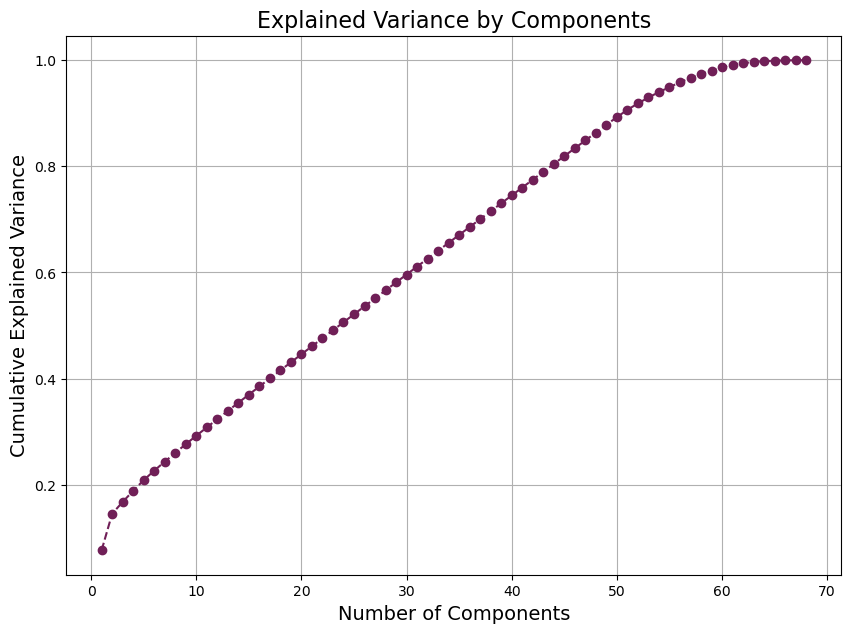

In [38]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assume X_scaled is your standardized data
pca = PCA().fit(X_scaled)

# Plotting the explained variance
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='#701f57')
plt.title('Explained Variance by Components', size=16)
plt.xlabel('Number of Components', size=14)
plt.ylabel('Cumulative Explained Variance', size=14)
plt.grid(True)
plt.savefig('images/Scree-elbow-varience.png')
plt.show()


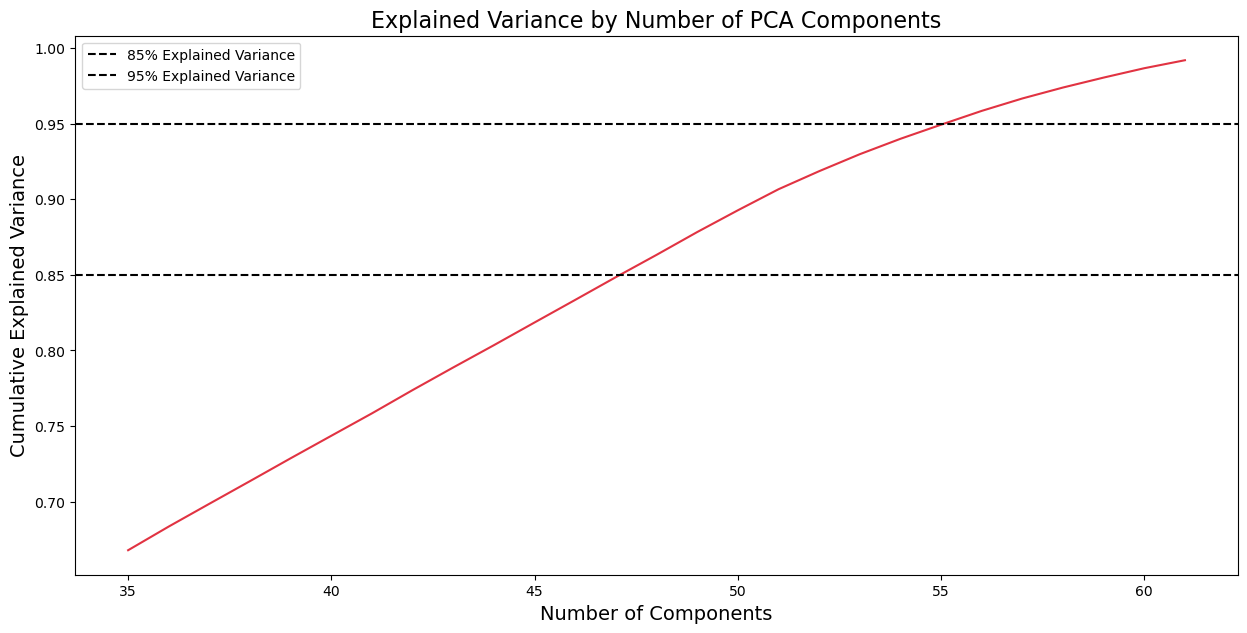

    Covered Variance  n_components
0           0.667849            35
1           0.683517            36
2           0.698592            37
3           0.713574            38
4           0.728683            39
5           0.743555            40
6           0.758385            41
7           0.773772            42
8           0.788742            43
9           0.803464            44
10          0.818477            45
11          0.833416            46
12          0.848456            47
13          0.863177            48
14          0.878256            49
15          0.892645            50
16          0.906566            51
17          0.918512            52
18          0.929750            53
19          0.939936            54
20          0.949272            55
21          0.958400            56
22          0.966613            57
23          0.973853            58
24          0.980424            59
25          0.986623            60
26          0.991907            61


In [44]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

pca_df = pd.DataFrame()
pca_df['Covered Variance'] = ""
pca_df['n_components'] = ""

totalvariance = []
n_components = []
for i in range(35, 62):
    X_scaled = scaler.fit_transform(college_imputed_df)
    pca = PCA(n_components=i)
    ccinfo_pca = pca.fit_transform(X_scaled)
    variance = pca.explained_variance_ratio_.sum()   
    rowcount = i 
    totalvariance.append(variance)
    n_components.append(i)

pca_df['Covered Variance'] = totalvariance
pca_df['n_components'] = n_components

plt.figure(figsize=(15, 7))
ax = sns.lineplot(x='n_components', y='Covered Variance', data=pca_df, color='#e13342')
ax.axhline(y = 0.85, color='black', linestyle='--', label = '85% Explained Variance')
ax.axhline(y = 0.95, color='black', linestyle='--', label = '95% Explained Variance')
plt.title('Explained Variance by Number of PCA Components', size=16)
plt.xlabel('Number of Components', size=14)
plt.ylabel('Cumulative Explained Variance', size=14)
plt.legend(loc='best')
plt.savefig('images/pca_components.png')
plt.show()

print(pca_df)